### Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### Importing the faker library

In [3]:
from faker import Faker
fake = Faker()

### Creating the synthetic dataset

In [4]:
def stroke_data(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)
    
    output = [
        {
            "id": x+1,
            "gender": np.random.choice(["Male","Female"], p=[0.66,0.34]),
            "age": fake.random_int(20,80),
            "hypertension": np.random.choice([0,1], p=[0.6,0.4]),
            "heart_disease": np.random.choice([0,1], p=[0.6,0.4]),
            "ever_married": np.random.choice(["Yes","No"], p=[0.65,0.35]),
            "work_type": np.random.choice(["children","Private","Govt_job","Self-employed"], p=[0.1,0.4,0.2,0.3]),
            "Residence_type": np.random.choice(["Rural","Urban"], p=[0.3,0.7]),
            "avg_glucose_level": fake.random_int(70,160),
            "bmi": fake.random_int(15,50),
            "smoking_status": np.random.choice(["Unknown","never smoked","formerly smoked","smokes"], p=[0.1,0.2,0.4,0.3]),
            "stroke": np.random.choice([0,1], p=[0.6,0.4])
        }
        for x in range(num)
    ]
    return output

### Loading the dataset to a dataframe

In [5]:
df = pd.DataFrame(stroke_data(num=50000,seed=0))
df
df.to_csv('stroke.csv')

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Male,74,1,1,Yes,Private,Urban,119,41,formerly smoked,1
1,2,Female,22,0,1,Yes,Govt_job,Urban,103,47,Unknown,0
2,3,Male,51,1,1,No,Self-employed,Urban,121,34,formerly smoked,1
3,4,Male,50,1,0,No,Govt_job,Urban,115,28,never smoked,1
4,5,Male,52,0,0,Yes,Govt_job,Urban,87,33,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Female,45,0,1,Yes,Self-employed,Rural,111,44,smokes,0
49996,49997,Male,65,0,0,Yes,Self-employed,Rural,102,30,formerly smoked,1
49997,49998,Male,78,0,1,Yes,Private,Urban,110,26,never smoked,1
49998,49999,Female,29,1,1,No,Self-employed,Urban,144,17,smokes,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 50000 non-null  int64 
 1   gender             50000 non-null  object
 2   age                50000 non-null  int64 
 3   hypertension       50000 non-null  int64 
 4   heart_disease      50000 non-null  int64 
 5   ever_married       50000 non-null  object
 6   work_type          50000 non-null  object
 7   Residence_type     50000 non-null  object
 8   avg_glucose_level  50000 non-null  int64 
 9   bmi                50000 non-null  int64 
 10  smoking_status     50000 non-null  object
 11  stroke             50000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.6+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().sum()

0

### Creating 3 different lists to contain different types of values

In [10]:
categorical_cols = [ 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
continous_cols = ['age', 'avg_glucose_level', 'bmi']
label_col = ['stroke']

In [11]:
to_numeric = {
    'gender':{'Male': 0, 'Female': 1, 'Other': 2},
    'ever_married':{'No':0, 'Yes':1},
    'work_type': {'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4},
    'Residence_type': {'Rural': 0, 'Urban': 1},
    'smoking_status': {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3},
}

In [12]:
name_change = {
    'hypertension': {'0': "patient doesn't have hypertension", '1': 'patient has hypertension'}, 
    'heart_disease': {'0': "patient doesn't have any heart diseases", '1': "patient has a heart disease"},
}

In [13]:
df[continous_cols].describe()

,age,avg_glucose_level,bmi
count,50000.000000,50000.000000,50000.000000
mean,50.024320,114.937320,32.500820
std,17.678967,26.223666,10.372939
min,20.000000,70.000000,15.000000
25%,35.000000,92.000000,24.000000
50%,50.000000,115.000000,32.000000
75%,65.000000,138.000000,41.000000
max,80.000000,160.000000,50.000000


### Data Visualization

<BarContainer object of 2 artists>

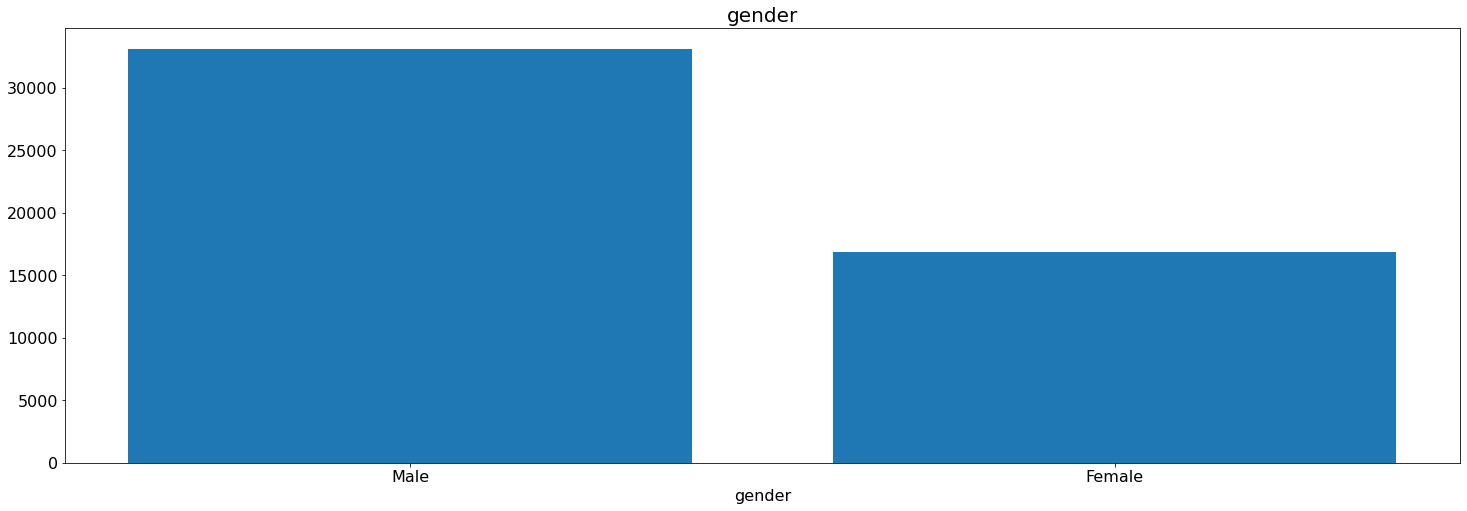

In [14]:
x = 'gender'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 61 artists>

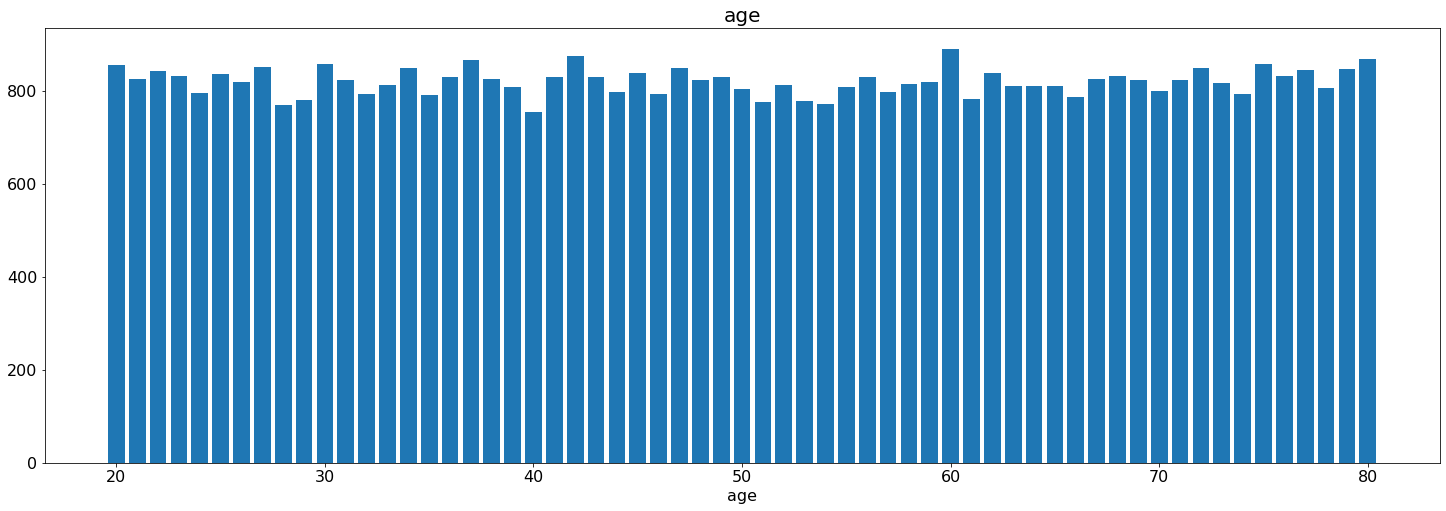

In [15]:
x = 'age'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 2 artists>

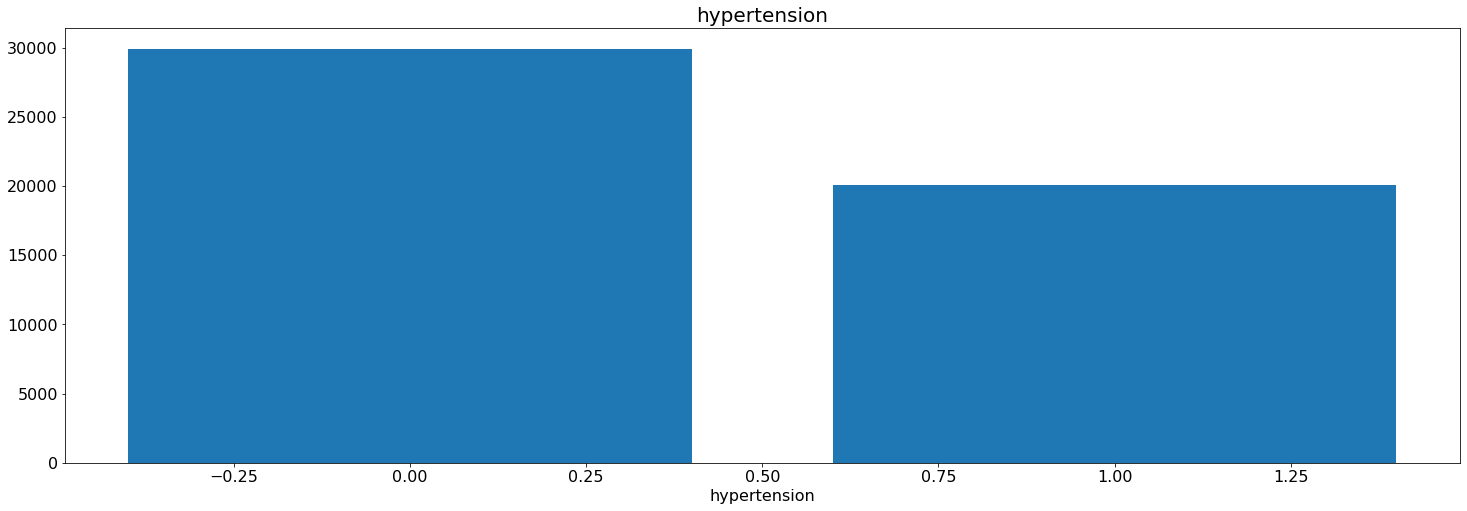

In [16]:
x = 'hypertension'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 2 artists>

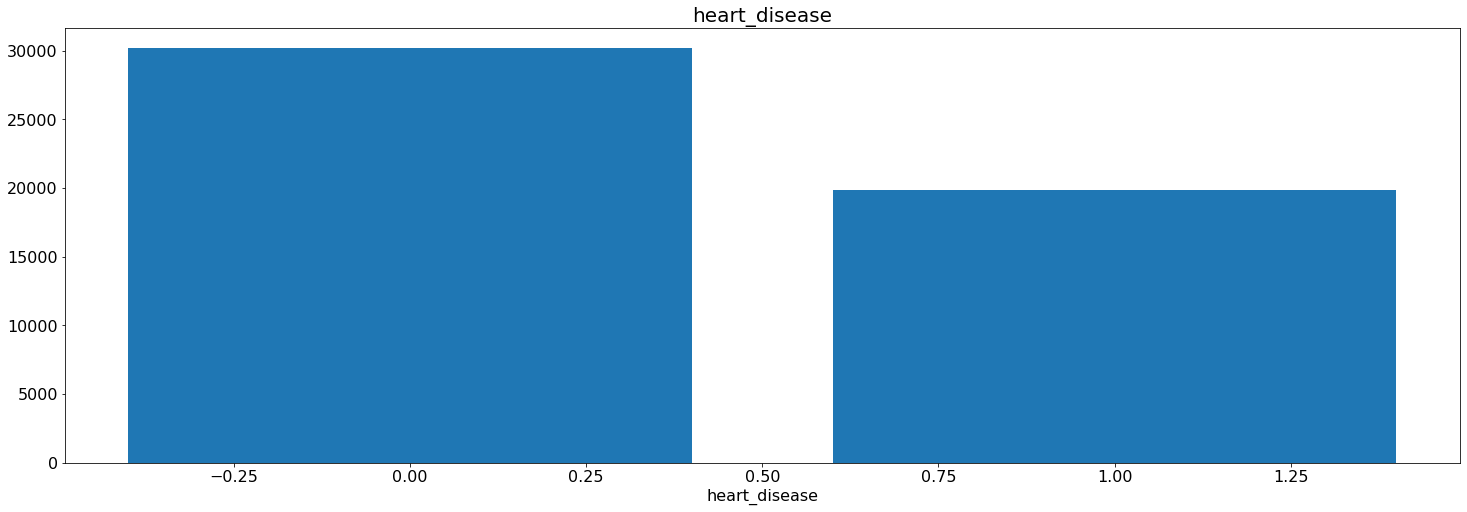

In [17]:
x = 'heart_disease'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 2 artists>

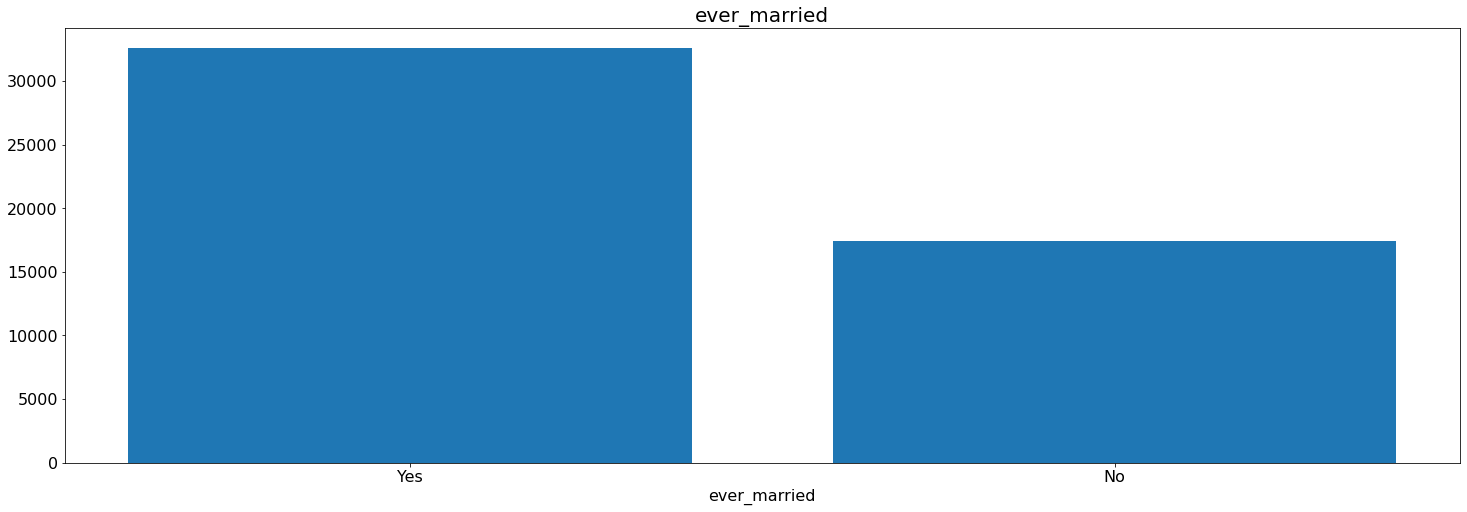

In [18]:
x = 'ever_married'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 4 artists>

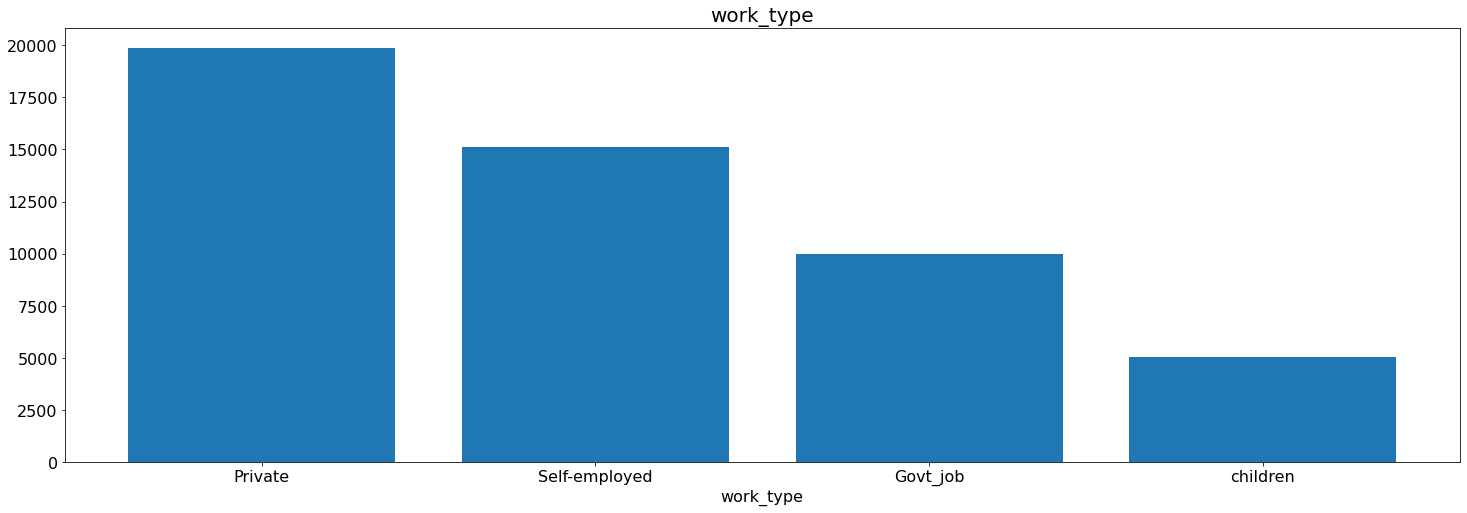

In [19]:
x = 'work_type'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 2 artists>

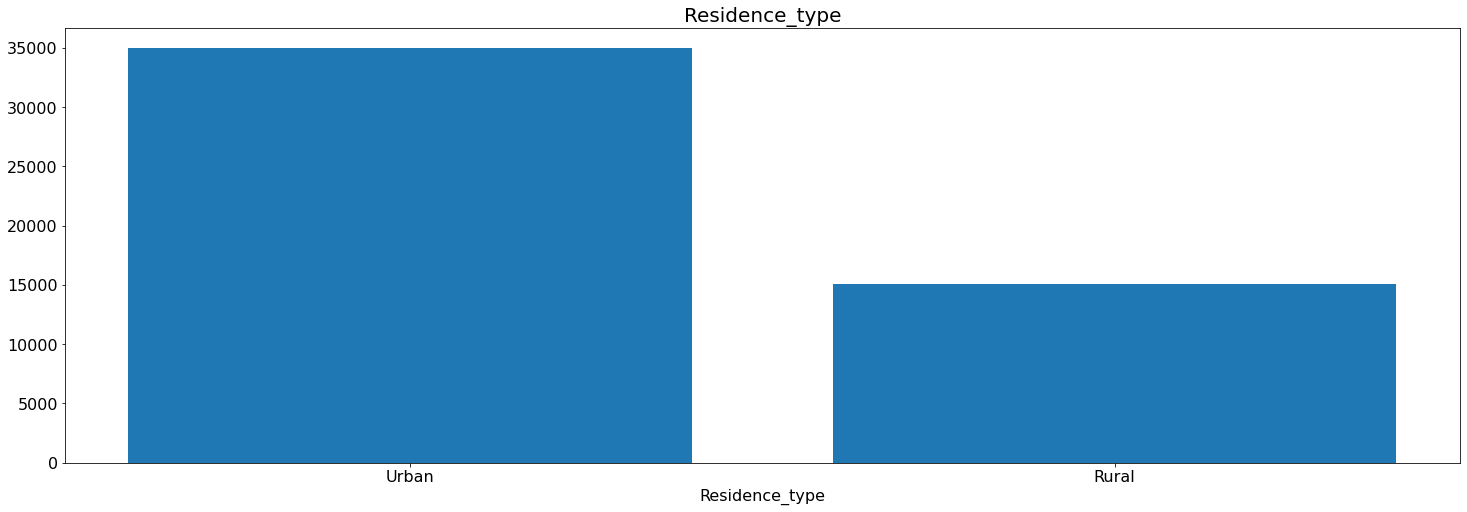

In [20]:
x = 'Residence_type'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 91 artists>

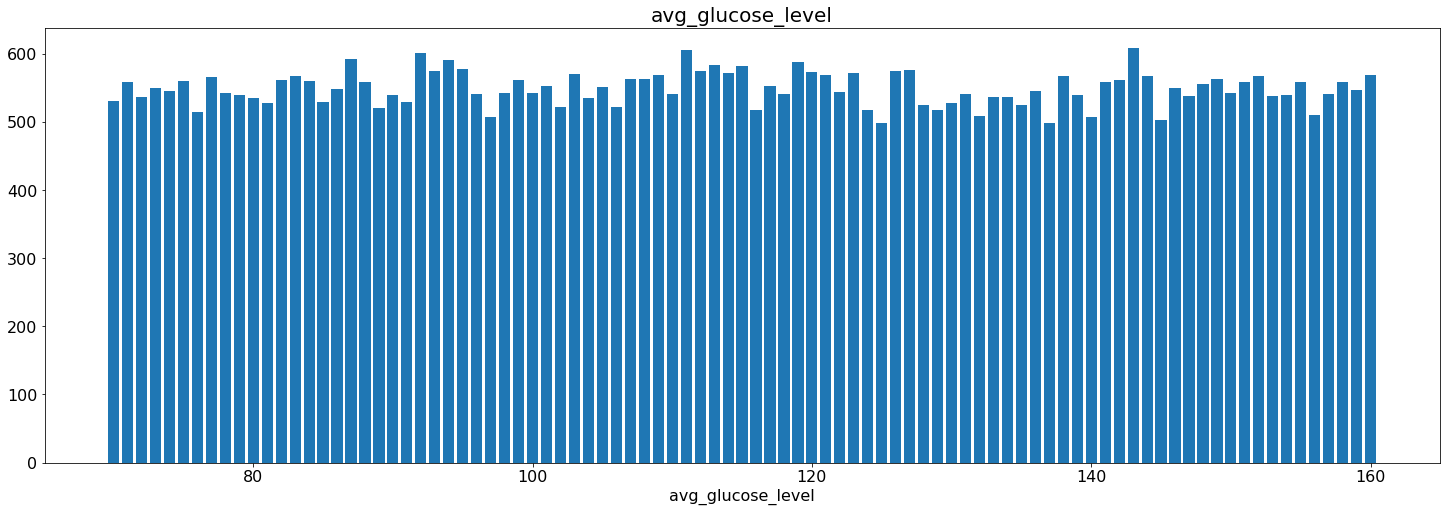

In [21]:
x = 'avg_glucose_level'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

<BarContainer object of 36 artists>

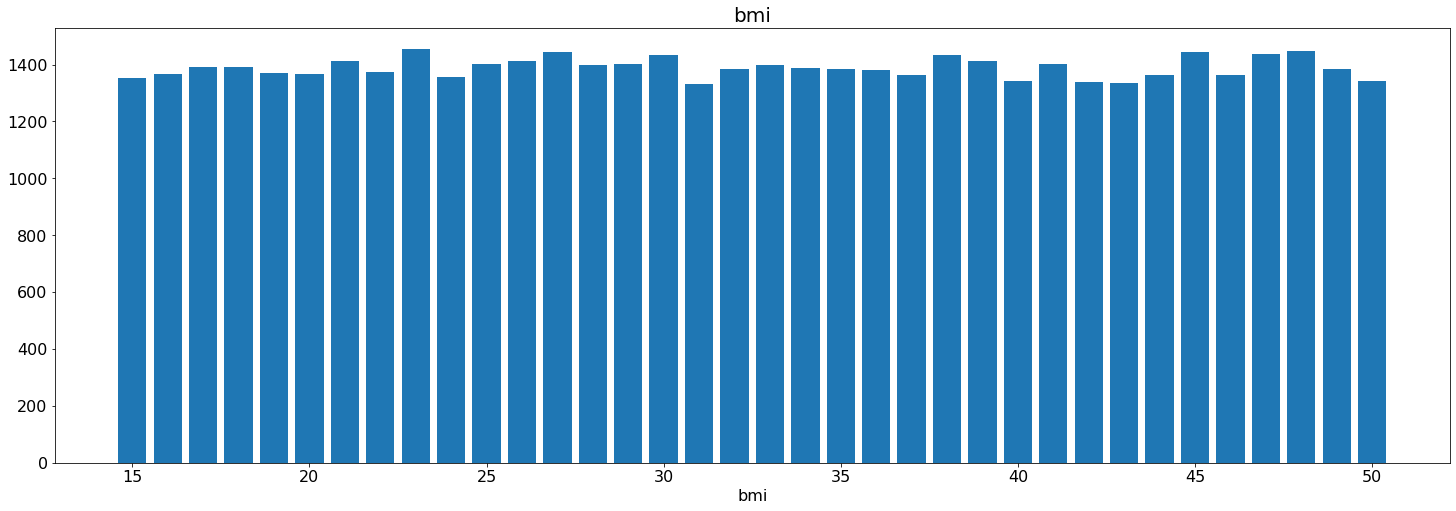

In [22]:
x = 'bmi'
val = df[x].value_counts().index
cnt = df[x].value_counts().values
plt.figure(figsize=(25,8))
plt.title(x,fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(x,fontsize=16)
plt.bar(val,cnt)

In [23]:
temp_df = df.copy()
temp_df = temp_df.drop(columns=['id'])
for x in categorical_cols:
    if x in to_numeric:
        temp_df[x] = temp_df[x].map(lambda a: to_numeric[x][a])

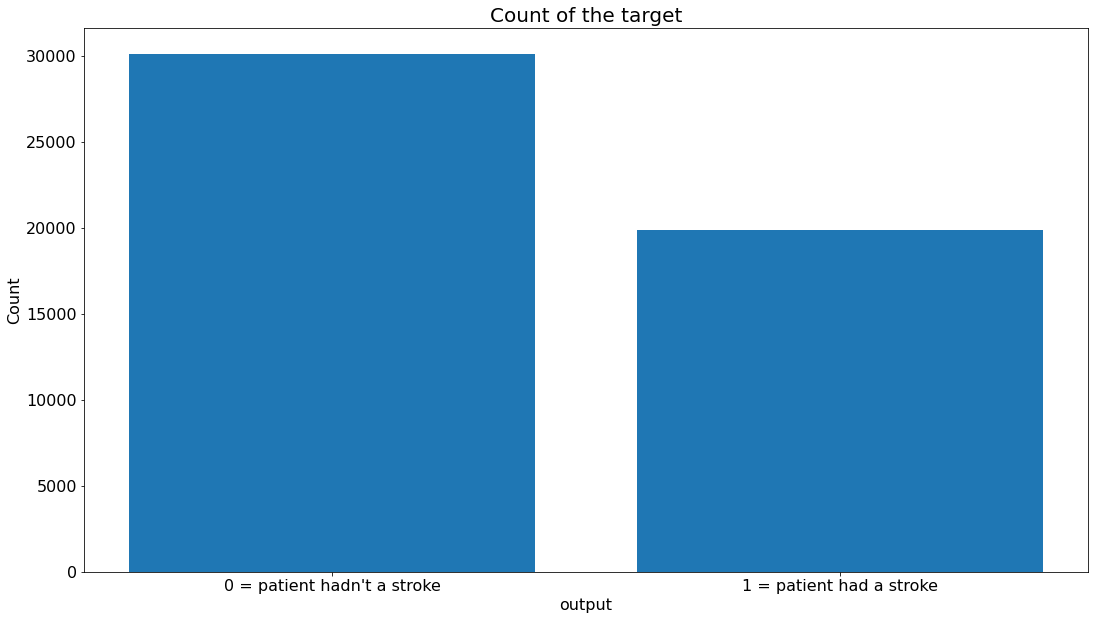

In [24]:
f1 = df['stroke'].map(lambda x:  '1 = patient had a stroke' if x == 1 else "0 = patient hadn't a stroke")

plt.figure(figsize=(18,10))
val = f1.value_counts().index
cnt = f1.value_counts().values

plt.title('Count of the target', size=20)
plt.tick_params(labelsize=16)
plt.ylabel('Count', size=16)
plt.xlabel('output', size=16)
plt.bar(val, cnt);
plt.show()

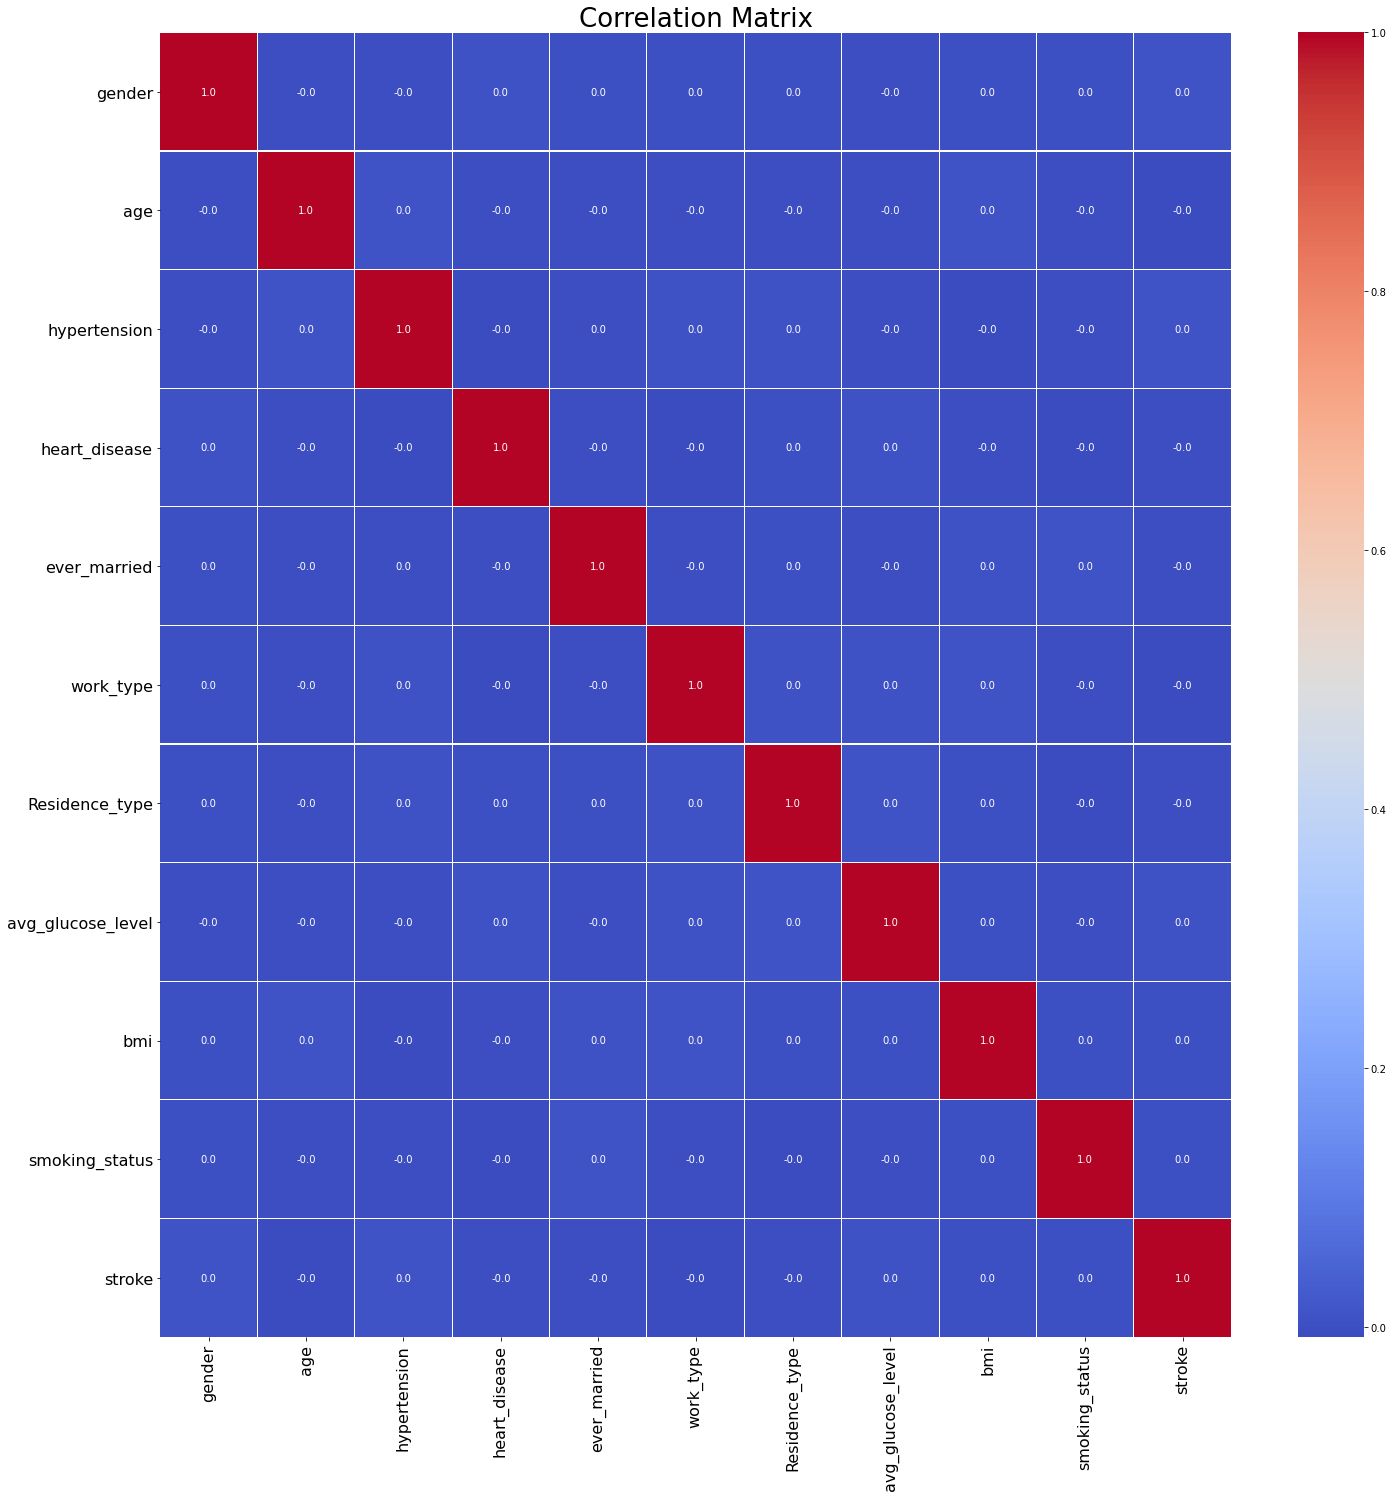

In [25]:
plt.figure(figsize = (24, 24))
sns.heatmap(temp_df.corr(), cmap = "coolwarm", annot=True, fmt='.1f', linewidths=0.1);
plt.yticks(rotation=0, size=16)
plt.xticks(rotation=90,size=16)
plt.title('Correlation Matrix', size=26)
plt.show()

### Dropping the 'id' column

In [26]:
df_tr = df.copy()
df_tr = df_tr.drop(columns=['id'])

In [27]:
for x in categorical_cols:
    if x in to_numeric:
        df_tr[x] = df_tr[x].map(lambda a: to_numeric[x][a])

In [28]:
X = df_tr.drop(['stroke'],axis=1)
y = df_tr['stroke']

### Splitting the given data into train and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

### Implementing Decision tree algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [31]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
pred_y = dt.predict(X_test)

In [33]:
pred_y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### Displaying the results

In [34]:
confusion_matrix(y_test,pred_y)

array([[3601, 2422],
       [2348, 1629]], dtype=int64)

In [35]:
accuracy_score(y_test,pred_y)

0.523

In [36]:
print(classification_report(y_test,pred_y,target_names=['Has Stroke','Doesn\'t have stroke']))

                     precision    recall  f1-score   support

         Has Stroke       0.61      0.60      0.60      6023
Doesn't have stroke       0.40      0.41      0.41      3977

           accuracy                           0.52     10000
          macro avg       0.50      0.50      0.50     10000
       weighted avg       0.52      0.52      0.52     10000



### Implementing Artificial neural networks algorithm

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X.loc[:, 1] = labelencoder_X_2.fit_transform(X.iloc[:, 1])

In [38]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,1
0,0,74,1,1,1,3,1,119,41,0,54
1,1,22,0,1,1,1,1,103,47,3,2
2,0,51,1,1,0,4,1,121,34,0,31
3,0,50,1,0,0,1,1,115,28,1,30
4,0,52,0,0,1,1,1,87,33,2,32
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,45,0,1,1,4,0,111,44,2,25
49996,0,65,0,0,1,4,0,102,30,0,45
49997,0,78,0,1,1,3,1,110,26,1,58
49998,1,29,1,1,0,4,1,144,17,2,9


In [39]:
X=X.drop(columns=1)

In [40]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,74,1,1,1,3,1,119,41,0
1,1,22,0,1,1,1,1,103,47,3
2,0,51,1,1,0,4,1,121,34,0
3,0,50,1,0,0,1,1,115,28,1
4,0,52,0,0,1,1,1,87,33,2
...,...,...,...,...,...,...,...,...,...,...
49995,1,45,0,1,1,4,0,111,44,2
49996,0,65,0,0,1,4,0,102,30,0
49997,0,78,0,1,1,3,1,110,26,1
49998,1,29,1,1,0,4,1,144,17,2


In [41]:
y

0        1
1        0
2        1
3        1
4        1
        ..
49995    0
49996    1
49997    1
49998    0
49999    0
Name: stroke, Length: 50000, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scaling the data

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Importing keras library

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [45]:
classifier = Sequential()

In [46]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [47]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [48]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [49]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
4000/4000 [==============================] - 4s 987us/step - loss: 0.6735 - accuracy: 0.6018
Epoch 2/100
4000/4000 [==============================] - 4s 982us/step - loss: 0.6724 - accuracy: 0.6018
Epoch 3/100
4000/4000 [==============================] - 4s 952us/step - loss: 0.6723 - accuracy: 0.6018
Epoch 4/100
4000/4000 [==============================] - 4s 961us/step - loss: 0.6723 - accuracy: 0.6018
Epoch 5/100
4000/4000 [==============================] - 4s 971us/step - loss: 0.6723 - accuracy: 0.6018
Epoch 6/100
4000/4000 [==============================] - 4s 960us/step - loss: 0.6722 - accuracy: 0.6018
Epoch 7/100
4000/4000 [==============================] - 4s 961us/step - loss: 0.6721 - accuracy: 0.6018
Epoch 8/100
4000/4000 [==============================] - 4s 962us/step - loss: 0.6721 - accuracy: 0.6018
Epoch 9/100
4000/4000 [==============================] - 4s 958us/step - loss: 0.6721 - accuracy: 0.6018
Epoch 10/100
4000/4000 [==============================]

### Displaying the results

In [51]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [52]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6031   12]
 [3952    5]]
0.6036
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      6043
           1       0.29      0.00      0.00      3957

    accuracy                           0.60     10000
   macro avg       0.45      0.50      0.38     10000
weighted avg       0.48      0.60      0.46     10000

